# Sales Analytics for Northwind Traders

Before we start working with PostgreSQL databases in Python, there are several steps we must complete first.
1. Install Homebrew using command line interface
2. Install PostgreSQL using command line interface
3. Download the Northwind SQL file using command line interface
4. Create a new PostgreSQL database using command line interface
5. Import the Northwind SQL file using command line interface
6. Verify the Northwind database installation by running some test queries in the command line
7. Connecting to the database Using Jupyter Notebook

The code below sets up a connection to a PostgreSQL database named Northwind on localhost, allowing you to execute SQL queries in the Jupyter Notebook.

In [4]:
%load_ext sql

connection_string = 'postgresql://@localhost:5432/northwind'

%sql $connection_string

## Exploring the Northwind Database - Getting to Know the Data

In [6]:
%%sql

SELECT table_name,
       table_type
  FROM information_schema.tables
 WHERE table_schema = 'public' AND table_type IN ('BASE TABLE', 'VIEW');

 * postgresql://@localhost:5432/northwind
14 rows affected.


table_name,table_type
region,BASE TABLE
products,BASE TABLE
employees,BASE TABLE
categories,BASE TABLE
employee_territories,BASE TABLE
customer_demographics,BASE TABLE
customer_customer_demo,BASE TABLE
territories,BASE TABLE
us_states,BASE TABLE
suppliers,BASE TABLE


Join orders and employees tables to see who is responsible for each order:

In [8]:
%%sql

SELECT e.first_name || ' ' || e.last_name AS full_name,
       o.order_id,
       o.order_date
  FROM orders o
  JOIN employees e ON o.employee_id = e.employee_id
 LIMIT 10;

 * postgresql://@localhost:5432/northwind
10 rows affected.


full_name,order_id,order_date
Steven Buchanan,10248,1996-07-04
Michael Suyama,10249,1996-07-05
Margaret Peacock,10250,1996-07-08
Janet Leverling,10251,1996-07-08
Margaret Peacock,10252,1996-07-09
Janet Leverling,10253,1996-07-10
Steven Buchanan,10254,1996-07-11
Anne Dodsworth,10255,1996-07-12
Janet Leverling,10256,1996-07-15
Margaret Peacock,10257,1996-07-16


Join orders and customers tables to get more detailed information about each customer:

In [10]:
%%sql

SELECT *
FROM orders AS o
JOIN customers AS c ON o.customer_id = c.customer_id

 * postgresql://@localhost:5432/northwind
830 rows affected.


order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country,customer_id_1,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,None,51100,France,26.47.15.10,26.47.15.11
10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,TOMSP,Toms Spezialitäten,Karin Josephs,Marketing Manager,Luisenstr. 48,Münster,None,44087,Germany,0251-031259,0251-035695
10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,HANAR,Hanari Carnes,Mario Pontes,Accounting Manager,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,(21) 555-0091,(21) 555-8765
10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France,VICTE,Victuailles en stock,Mary Saveley,Sales Agent,"2, rue du Commerce",Lyon,None,69004,France,78.32.54.86,78.32.54.87
10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.3,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium,SUPRD,Suprêmes délices,Pascale Cartrain,Accounting Manager,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium,(071) 23 67 22 20,(071) 23 67 22 21
10253,HANAR,3,1996-07-10,1996-07-24,1996-07-16,2,58.17,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,HANAR,Hanari Carnes,Mario Pontes,Accounting Manager,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,(21) 555-0091,(21) 555-8765
10254,CHOPS,5,1996-07-11,1996-08-08,1996-07-23,2,22.98,Chop-suey Chinese,Hauptstr. 31,Bern,None,3012,Switzerland,CHOPS,Chop-suey Chinese,Yang Wang,Owner,Hauptstr. 29,Bern,None,3012,Switzerland,0452-076545,None
10255,RICSU,9,1996-07-12,1996-08-09,1996-07-15,3,148.33,Richter Supermarkt,Starenweg 5,Genève,None,1204,Switzerland,RICSU,Richter Supermarkt,Michael Holz,Sales Manager,Grenzacherweg 237,Genève,None,1203,Switzerland,0897-034214,None
10256,WELLI,3,1996-07-15,1996-08-12,1996-07-17,2,13.97,Wellington Importadora,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil,WELLI,Wellington Importadora,Paula Parente,Sales Manager,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil,(14) 555-8122,None
10257,HILAA,4,1996-07-16,1996-08-13,1996-07-22,3,81.91,HILARION-Abastos,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,Táchira,5022,Venezuela,HILAA,HILARION-Abastos,Carlos Hernández,Sales Representative,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,Táchira,5022,Venezuela,(5) 555-1340,(5) 555-1948


Join order_details, products, and orders to get detailed order information including the product name and quantity:

In [12]:
%%sql

SELECT o.order_id, p.product_name, od.quantity, o.order_date
  FROM order_details od
  JOIN products p ON od.product_id = p.product_id
  JOIN orders o ON od.order_id = o.order_id
 LIMIT 10;

 * postgresql://@localhost:5432/northwind
10 rows affected.


order_id,product_name,quantity,order_date
10248,Queso Cabrales,12,1996-07-04
10248,Singaporean Hokkien Fried Mee,10,1996-07-04
10248,Mozzarella di Giovanni,5,1996-07-04
10249,Tofu,9,1996-07-05
10249,Manjimup Dried Apples,40,1996-07-05
10250,Jack's New England Clam Chowder,10,1996-07-08
10250,Manjimup Dried Apples,35,1996-07-08
10250,Louisiana Fiery Hot Pepper Sauce,15,1996-07-08
10251,Gustaf's Knäckebröd,6,1996-07-08
10251,Ravioli Angelo,15,1996-07-08


## Rank employees by sales performance

The management team wants to recognize and reward top-performing employees, fostering a culture of excellence within the organization.

Second, they want to identify employees who might be struggling so that they can offer the necessary training or resources to help them improve.

The management team is keen on encouraging healthy competition and rewarding stellar performers. They've asked you to rank employees based on their total sales amount.

In [15]:
%%sql

WITH
employeesales AS (
SELECT e.first_name, 
       SUM(od.unit_price * od.quantity * (1 - od.discount)) AS revenue
  FROM orders AS o
  JOIN employees AS e
    ON o.employee_id = e.employee_id
  JOIN order_details AS od
    ON o.order_id = od.order_id
 GROUP BY e.first_name
 ORDER BY revenue DESC
)

SELECT first_name, 
       revenue, 
       RANK() OVER(ORDER BY revenue DESC) AS rank
FROM employeesales

 * postgresql://@localhost:5432/northwind
9 rows affected.


first_name,revenue,rank
Margaret,232890.84598203757,1
Janet,202812.84238787484,2
Nancy,192107.60465689204,3
Andrew,166537.75528742478,4
Laura,126862.2774778762,5
Robert,124568.23485103557,6
Anne,77308.06623830303,7
Michael,73913.12937797053,8
Steven,68792.28239394959,9


## Find the running total of sales revenue each month

Management would like to understand the company's overall sales performance over time. They're looking to visualize the progress of the sales and identify trends that might shape the company's future strategies.

This visual will provide the management team with a clear depiction of sales trends and help identify periods of high or low sales activity.

In [18]:
%%sql

WITH
monthlytotals AS (
SELECT DATE_TRUNC('month', o.order_date)::DATE AS month, 
       SUM(od.unit_price * od.quantity * (1 - od.discount)) AS revenue
  FROM orders AS o
  JOIN order_details AS od
    ON o.order_id = od.order_id
 GROUP BY month
 ORDER BY month
)

SELECT month, 
       ROUND(SUM(revenue) OVER(ORDER BY month)::NUMERIC, 2) AS running_total
  FROM monthlytotals

 * postgresql://@localhost:5432/northwind
23 rows affected.


month,running_total
1996-07-01,27861.90
1996-08-01,53347.17
1996-09-01,79728.57
1996-10-01,117244.30
1996-11-01,162844.34
1996-12-01,208083.97
1997-01-01,269342.04
1997-02-01,307825.68
1997-03-01,346372.90
1997-04-01,399405.85


## Calculate the month-over-month sales growth rate

Management would like to analyze the month-over-month sales growth rate. Understanding the rate at which sales are increasing or decreasing from month to month will help the management team identify significant trends.

In [21]:
%%sql

WITH revenues AS (
SELECT DATE_TRUNC('month', order_date)::DATE AS month,
       SUM(unit_price * quantity * (1 - discount)) AS revenue
  FROM orders AS o
  JOIN order_details AS od
    ON od.order_id = o.order_id
 GROUP BY month
 ORDER BY month
),

lagged AS (
SELECT month, revenue, LAG(revenue) OVER() AS lagged_rev
FROM revenues
)

SELECT month, ((revenue - lagged_rev) / lagged_rev) * 100 AS growth_rate
FROM lagged

 * postgresql://@localhost:5432/northwind
23 rows affected.


month,growth_rate
1996-07-01,None
1996-08-01,-8.530001451294545
1996-09-01,3.51624637896504
1996-10-01,42.20520805162909
1996-11-01,21.54915112904513
1996-12-01,-0.7903823696967553
1997-01-01,35.40798079057388
1997-02-01,-37.17785290199861
1997-03-01,0.16522649038887202
1997-04-01,37.579187910257275


## Calculate the quarterly growth rate

Management would like to analyze the quarterly sales growth rate. Understanding the rate at which sales are increasing or decreasing from month to month will help the management team identify significant trends.

In [24]:
%%sql

SELECT DATE_TRUNC('quarter', order_date)::DATE AS quarter,
       SUM(unit_price * quantity * (1 - discount)) AS revenue
  FROM orders AS o
  JOIN order_details AS od
    ON od.order_id = o.order_id
 GROUP BY quarter
 ORDER BY quarter

 * postgresql://@localhost:5432/northwind
8 rows affected.


quarter,revenue
1996-07-01,79728.57033299236
1996-10-01,128355.40064983034
1997-01-01,138288.92522802952
1997-04-01,143177.0445488856
1997-07-01,153937.7696086094
1997-10-01,181681.4630071761
1998-01-01,298491.552590101
1998-04-01,142132.3126877398


In [25]:
%%sql

WITH quarterlysales AS (
SELECT DATE_TRUNC('quarter', order_date)::DATE AS quarter,
       SUM(unit_price * quantity * (1 - discount)) AS revenue
  FROM orders AS o
  JOIN order_details AS od
    ON od.order_id = o.order_id
 GROUP BY quarter
 ORDER BY quarter
 ),

laggedsales AS (
SELECT quarter, revenue, LAG(revenue) OVER(ORDER BY quarter) AS lagged_revenue
  FROM quarterlysales
)

SELECT *, ((revenue - lagged_revenue) / revenue) * 100 AS growth_rate
FROM laggedsales

 * postgresql://@localhost:5432/northwind
8 rows affected.


quarter,revenue,lagged_revenue,growth_rate
1996-07-01,79728.57033299236,None,None
1996-10-01,128355.40064983034,79728.57033299236,37.88452224889086
1997-01-01,138288.92522802952,128355.40064983034,7.183167098753167
1997-04-01,143177.0445488856,138288.92522802952,3.414038427917901
1997-07-01,153937.7696086094,143177.0445488856,6.990308542915239
1997-10-01,181681.4630071761,153937.7696086094,15.270514085122077
1998-01-01,298491.552590101,181681.4630071761,39.133465777952054
1998-04-01,142132.3126877398,298491.552590101,-110.00963605360982


## Identify customers with above-average order values

Management wants to identify high-value customers to whom they can offer targeted promotions and special offers, which could drive increased sales, improve customer retention, and attract new customers.

To do this, they've asked you to identify customers with above-average order values. These customers might be businesses buying in bulk or individuals purchasing high-end products.

In [28]:
%%sql

WITH revenues AS (
SELECT o.customer_id, o.order_id, SUM(od.unit_price * od.quantity * (1 - od.discount)) AS revenue
  FROM orders AS o
  JOIN order_details AS od
    ON o.order_id = od.order_id
 GROUP BY o.order_id
 ORDER BY o.order_id
),

averages AS (
SELECT *, AVG(revenue) OVER() AS avg_revenue
FROM revenues
)

SELECT *,
CASE
WHEN revenue < avg_revenue THEN 'Below Average'
WHEN revenue > avg_revenue THEN 'Above Average'
ELSE 'Average'
END AS benchmark
FROM averages

 * postgresql://@localhost:5432/northwind
830 rows affected.


customer_id,order_id,revenue,avg_revenue,benchmark
VINET,10248,439.99999809265137,1525.0518537992339,Below Average
TOMSP,10249,1863.4000644683838,1525.0518537992339,Above Average
HANAR,10250,1552.600023412704,1525.0518537992339,Above Average
VICTE,10251,654.0599855789542,1525.0518537992339,Below Average
SUPRD,10252,3597.9001445159315,1525.0518537992339,Above Average
HANAR,10253,1444.7999839782715,1525.0518537992339,Below Average
CHOPS,10254,556.62000967741,1525.0518537992339,Below Average
RICSU,10255,2490.4999780654907,1525.0518537992339,Above Average
WELLI,10256,517.8000068664551,1525.0518537992339,Below Average
HILAA,10257,1119.899953842163,1525.0518537992339,Below Average


## Find the percentage of total sales for each product category.

The mananagement team wants to gain an understanding of sales composition across different product categories. By knowing the percentage of total sales for each product category, they can gain insights into which categories drive most of the company's sales.

This understanding will help guide decisions about inventory (e.g., which categories should be stocked more heavily) and marketing strategies (e.g., which categories should be promoted more aggressively).

In [31]:
%%sql

WITH
category_sales AS (
SELECT c.category_name, ROUND(SUM((od.unit_price * od.quantity) * (1 - od.discount))::numeric, 2) AS cat_revenue
  FROM products AS p
  JOIN order_details AS od ON p.product_id = od.product_id
  JOIN categories AS c ON p.category_id = c.category_id
 GROUP BY c.category_name
)

SELECT *, ROUND((cat_revenue / SUM(cat_revenue) OVER() * 100)::numeric, 2) AS percent_of_sales
  FROM category_sales
 ORDER BY percent_of_sales DESC

 * postgresql://@localhost:5432/northwind
8 rows affected.


category_name,cat_revenue,percent_of_sales
Beverages,267868.18,21.16
Dairy Products,234507.28,18.53
Confections,167357.23,13.22
Meat/Poultry,163022.36,12.88
Seafood,131261.74,10.37
Condiments,106047.08,8.38
Produce,99984.58,7.90
Grains/Cereals,95744.59,7.56


Beverages is the top category in terms of sales percentages, followed closely by Dairy Products. Produce and Grains/Cereals are the categories with the smallest sales percentage.

## Identify Top 3 Products Sold in Each Category

The management team wants to know the top three items sold in each product category. This will allow them to identify star performers and ensure that these products are kept in stock and marketed prominently.

In [35]:
%%sql

WITH
product_revenue AS (
SELECT c.category_name, p.category_id, 
       p.product_id, p.product_name,
       SUM(od.unit_price * od.quantity * (1 - od.discount)) AS revenue
FROM products AS p
JOIN order_details AS od 
ON p.product_id = od.product_id
JOIN categories AS C on p.category_id = c.category_id
GROUP BY c.category_name, p.category_id, p.product_id
ORDER BY revenue DESC
)

SELECT category_name, category_id, product_id, product_name, revenue, rn
FROM(
SELECT *, ROW_NUMBER() OVER(PARTITION BY category_id ORDER BY revenue DESC) AS rn
FROM product_revenue
) tmp
WHERE rn <= 3

 * postgresql://@localhost:5432/northwind
24 rows affected.


category_name,category_id,product_id,product_name,revenue,rn
Beverages,1,38,Côte de Blaye,141396.7356273254,1
Beverages,1,43,Ipoh Coffee,23526.699842727183,2
Beverages,1,2,Chang,16355.959905386866,3
Condiments,2,63,Vegie-spread,16701.095047264098,1
Condiments,2,61,Sirop d'érable,14352.599874171614,2
Condiments,2,65,Louisiana Fiery Hot Pepper Sauce,13869.8894459071,3
Confections,3,62,Tarte au sucre,47234.969978504174,1
Confections,3,20,Sir Rodney's Marmalade,22563.36029526442,2
Confections,3,26,Gumbär Gummibärchen,19849.14417082793,3
Dairy Products,4,59,Raclette Courdavault,71155.69990943,1


# Part Two
## Converting SQL Code into Data Visualizations

### Visualizing Employee Performance

<Axes: title={'center': 'Employee Sales Revenues'}, xlabel='First Name'>

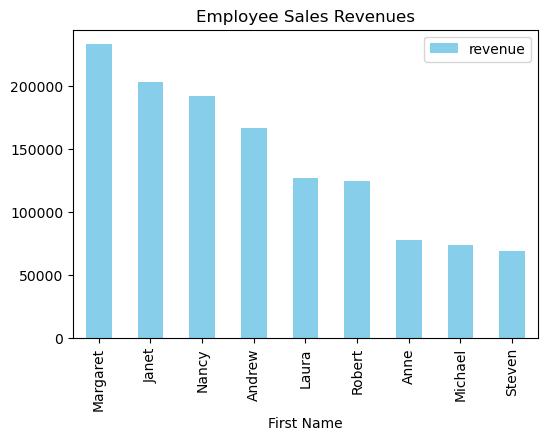

In [38]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Create an engine instance (adjust with your database credentials)
engine = create_engine('postgresql://@localhost:5432/northwind')

# Define the SQL query
query = '''
WITH
employeesales AS (
SELECT e.first_name, 
       SUM(od.unit_price * od.quantity * (1 - od.discount)) AS revenue
  FROM orders AS o
  JOIN employees AS e
    ON o.employee_id = e.employee_id
  JOIN order_details AS od
    ON o.order_id = od.order_id
 GROUP BY e.first_name
 ORDER BY revenue DESC
)

SELECT first_name, 
       revenue, 
       RANK() OVER(ORDER BY revenue DESC) AS rank
FROM employeesales
'''

# Fetch data into DataFrame
df1 = pd.read_sql(query, engine)
# Making a plot using the DataFrame.plot() method
df1.plot(x='first_name', y='revenue', kind='bar', color='skyblue', title='Employee Sales Revenues', xlabel='First Name', figsize=(6,4))

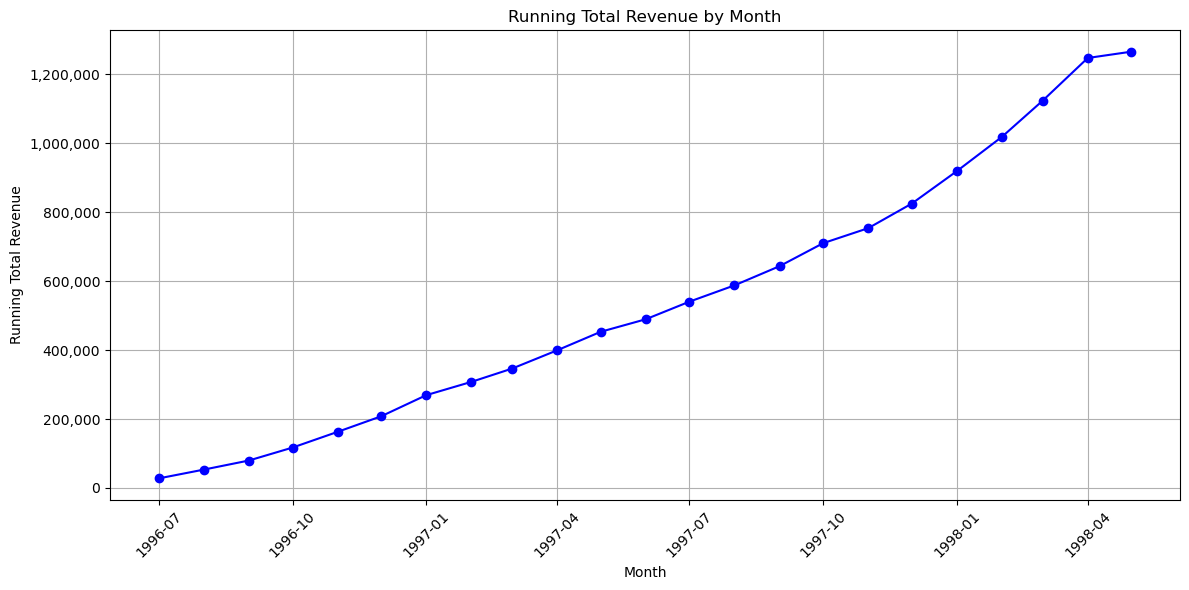

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sqlalchemy import create_engine

# Create a database connection
engine = create_engine('postgresql://@localhost:5432/northwind')

# Execute the SQL query
query = """
WITH
monthlytotals AS (
    SELECT DATE_TRUNC('month', o.order_date)::DATE AS month, 
           SUM(od.unit_price * od.quantity * (1 - od.discount)) AS revenue
      FROM orders AS o
      JOIN order_details AS od
        ON o.order_id = od.order_id
     GROUP BY month
     ORDER BY month
)

SELECT month, 
       ROUND(SUM(revenue) OVER(ORDER BY month)::NUMERIC, 2) AS running_total
  FROM monthlytotals
"""

df2 = pd.read_sql(query, engine)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df2['month'], df2['running_total'], marker='o', linestyle='-', color='b')
plt.title('Running Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Running Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)

# Use FuncFormatter to display full numbers
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()

# Show plot
plt.show()

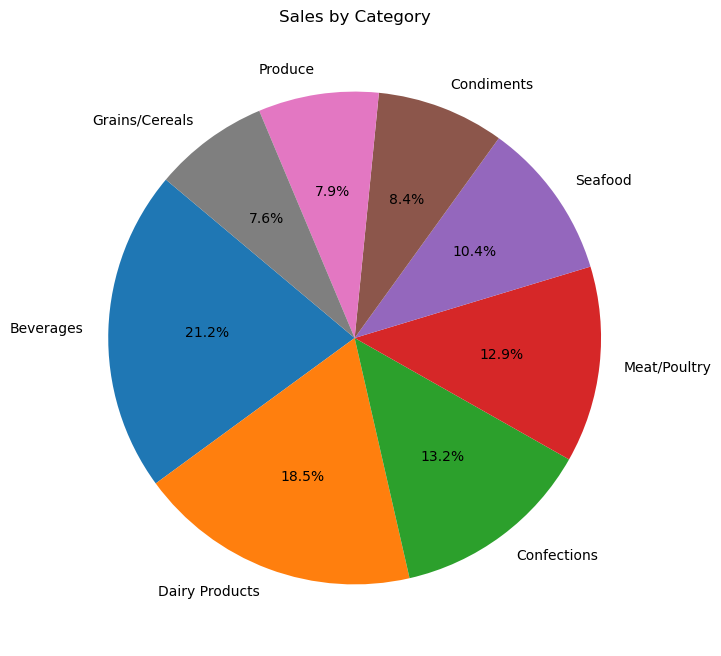

In [40]:
query = '''
WITH
category_sales AS (
SELECT c.category_name, ROUND(SUM((od.unit_price * od.quantity) * (1 - od.discount))::numeric, 2) AS cat_revenue
  FROM products AS p
  JOIN order_details AS od ON p.product_id = od.product_id
  JOIN categories AS c ON p.category_id = c.category_id
 GROUP BY c.category_name
)

SELECT *, ROUND((cat_revenue / SUM(cat_revenue) OVER() * 100)::numeric, 2) AS percent_of_sales
  FROM category_sales
 ORDER BY percent_of_sales DESC
'''

df3 = pd.read_sql(query, engine)
plt.figure(figsize=(8, 8))
plt.pie(df3['percent_of_sales'], labels=df3['category_name'], autopct='%1.1f%%', startangle=140)
plt.title('Sales by Category')
plt.show()

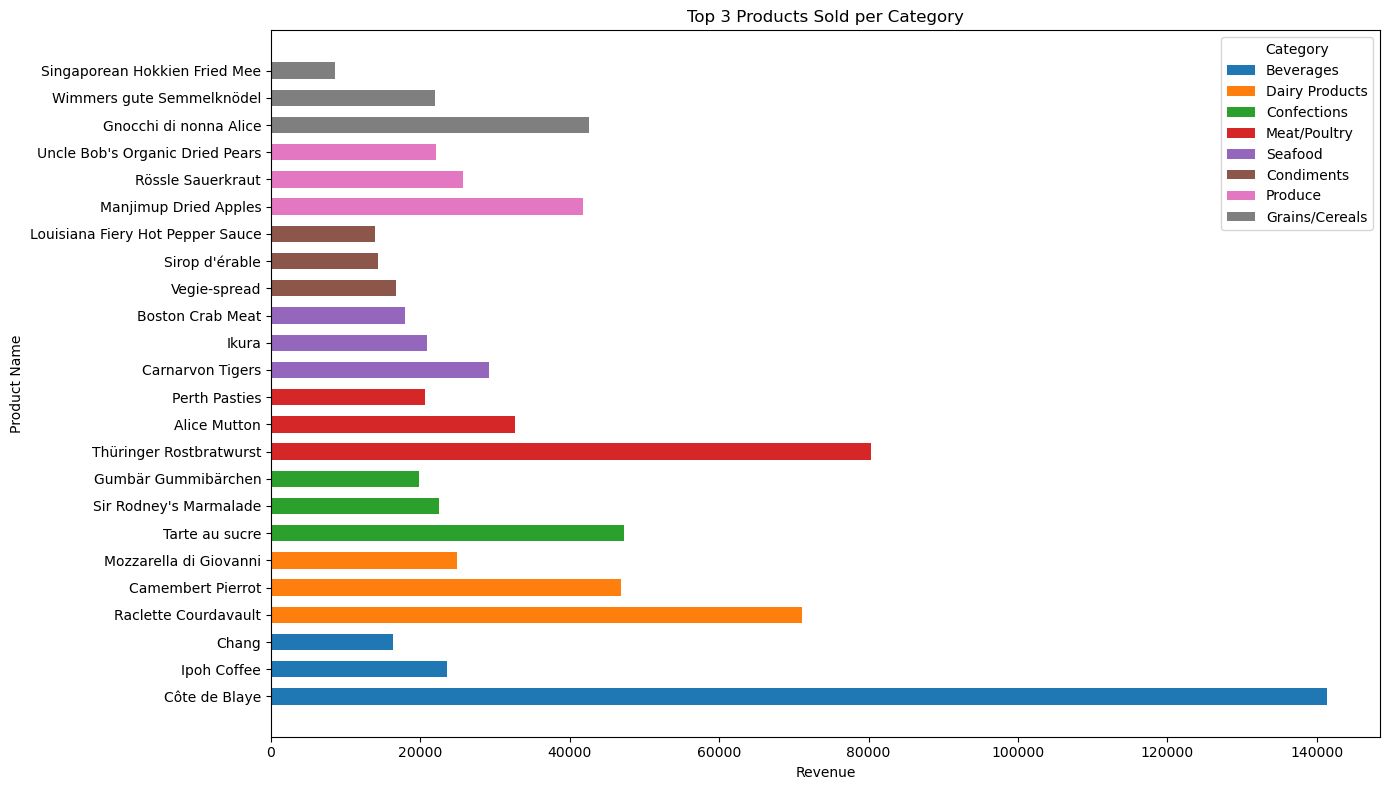

In [156]:
query = '''
WITH product_revenue AS (
    SELECT c.category_name, p.product_id, p.product_name,
           SUM(od.unit_price * od.quantity * (1 - od.discount)) AS revenue
    FROM products AS p
    JOIN order_details AS od ON p.product_id = od.product_id
    JOIN categories AS c ON p.category_id = c.category_id
    GROUP BY c.category_name, p.product_id, p.product_name
),
category_revenue AS (
    SELECT category_name,
           SUM(revenue) AS total_revenue
    FROM product_revenue
    GROUP BY category_name
),
ranked_products AS (
    SELECT pr.category_name, pr.product_id, pr.product_name, pr.revenue,
           cr.total_revenue,
           ROW_NUMBER() OVER (PARTITION BY pr.category_name ORDER BY pr.revenue DESC) AS rn
    FROM product_revenue pr
    JOIN category_revenue cr ON pr.category_name = cr.category_name
)
SELECT rp.category_name, rp.product_id, rp.product_name, rp.revenue, rp.total_revenue
FROM ranked_products rp
WHERE rp.rn <= 3
ORDER BY rp.total_revenue DESC, rp.revenue DESC
'''

df4 = pd.read_sql(query, engine)
plt.figure(figsize=(14, 8))

# Create the horizontal bar plot with custom thickness
for category in df4['category_name'].unique():
    subset = df4[df4['category_name'] == category]
    plt.barh(subset['product_name'], subset['revenue'], label=category, height=0.6)  # Adjust height for thickness

plt.ylabel('Product Name')
plt.xlabel('Revenue')
plt.title('Top 3 Products Sold per Category')
plt.legend(title='Category')

plt.tight_layout()
plt.show()